In [3]:
import scipy.io as sio
import scipy
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import math
import pickle
from sklearn.cluster import KMeans, AgglomerativeClustering

In [4]:
img_data = pickle.load( open( "../pickles/img_data.p", "rb" ) )

In [5]:
joint_lst = img_data['joint_lst']
joint_arr = np.array(joint_lst)

In [6]:
joint_arr_reshaped = joint_arr.reshape(-1, 8)
print(joint_arr[0])
print(joint_arr_reshaped[0])

[[-1.24283188 -0.78921668]
 [-0.53474962 -0.7007064 ]
 [-0.46099105  0.03687928]
 [ 0.80765632 -0.43517555]]
[-1.24283188 -0.78921668 -0.53474962 -0.7007064  -0.46099105  0.03687928
  0.80765632 -0.43517555]


In [7]:
#print(joint_arr.shape)
#kmeans = KMeans(n_clusters=400, random_state=0).fit(joint_arr_reshaped)
kmeans = AgglomerativeClustering(n_clusters=50).fit(joint_arr_reshaped)

In [8]:
zero_class = []
for indx, i in enumerate(kmeans.labels_[:1000]):
    if i == 2:
        zero_class.append(indx)

In [ ]:
def draw_pts(img, x, y):
    #print(x, " ", y)
    img = cv2.circle(img, (int(x), int(y)), 2, (255,0,0), 3)
    return img

def display_img(filename, joint_pos):
    img = cv2.imread("../mpii/images/"+filename)
    img = cv2.resize(img, (100, 50)) 
    for joint_name, joint in joint_pos.items():
        #print(joint_name, " ", joint)
        if joint_name in ['r_wrist', 'r_elbow', 'r_shoulder']:
            print(joint_name , joint)
            img = draw_pts(img, joint[0], joint[1])
    img = img[...,::-1]
    plt.figure(figsize=(20, 30))
    plt.imshow(img)
    plt.show()

r_wrist [775.0, 457.0]
r_elbow [817.0, 441.0]
r_shoulder [844.0, 390.0]


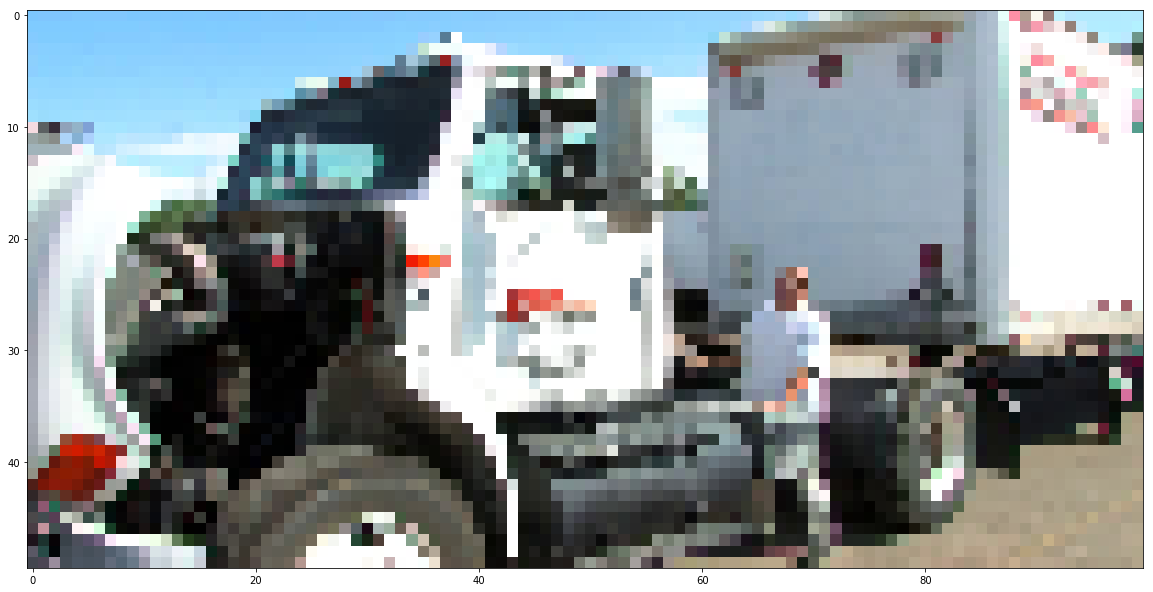

r_wrist [23.0, 324.0]
r_elbow [21.0, 306.0]
r_shoulder [22.0, 281.0]


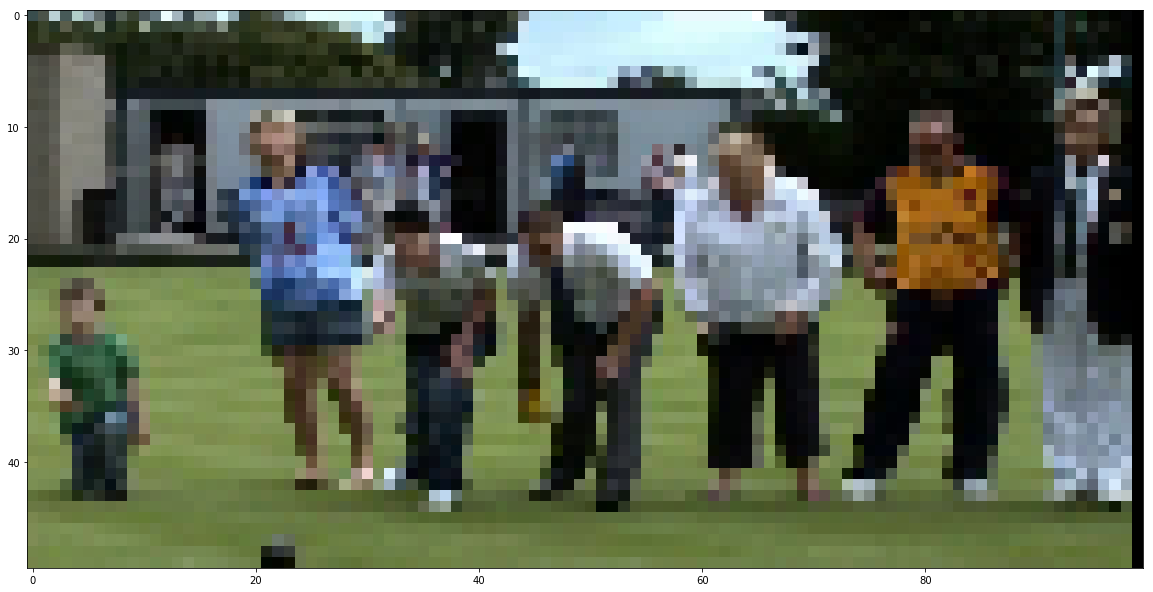

r_wrist [271.0, 256.0]
r_elbow [268.0, 230.0]
r_shoulder [270.0, 208.0]


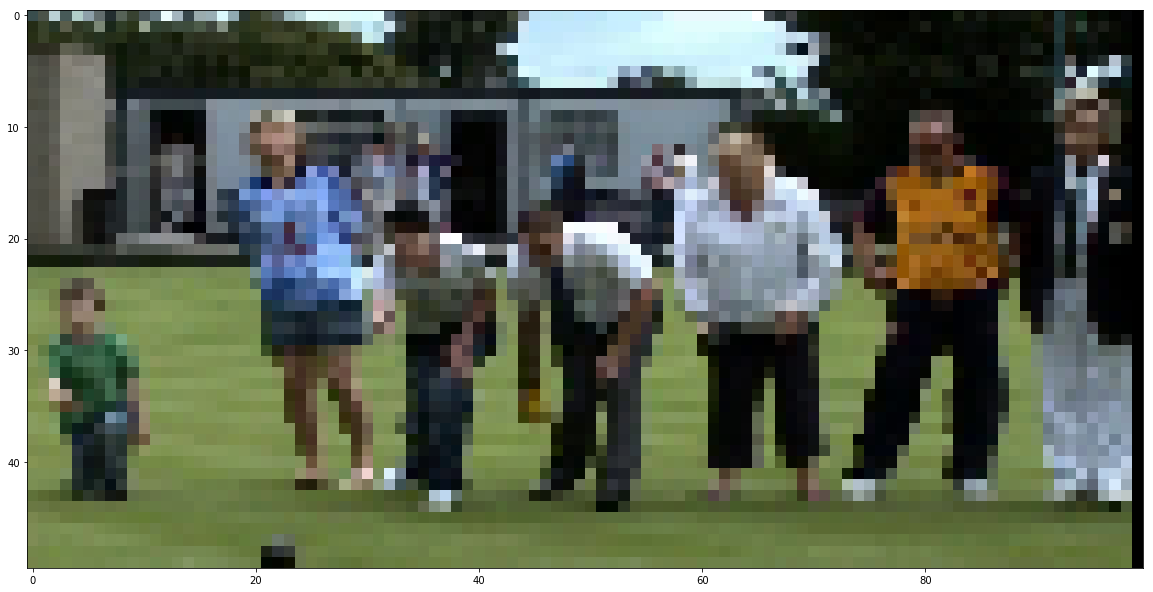

r_wrist [645.0, 223.0]
r_elbow [636.0, 179.0]
r_shoulder [662.0, 139.0]


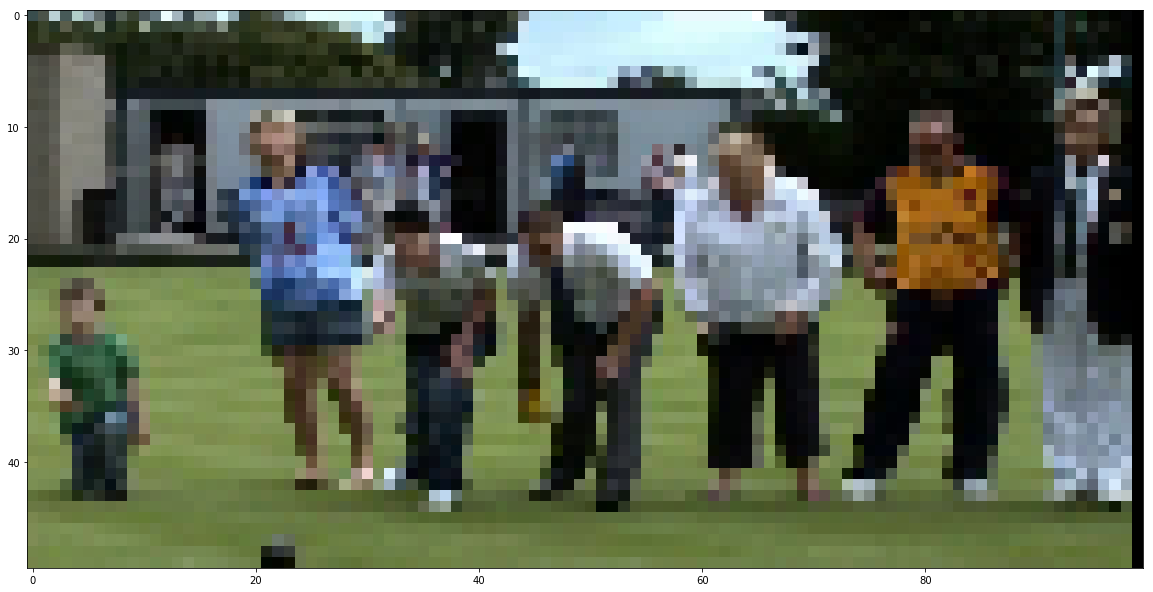

r_wrist [414.0, 168.0]
r_elbow [372.0, 135.0]
r_shoulder [413.0, 86.0]


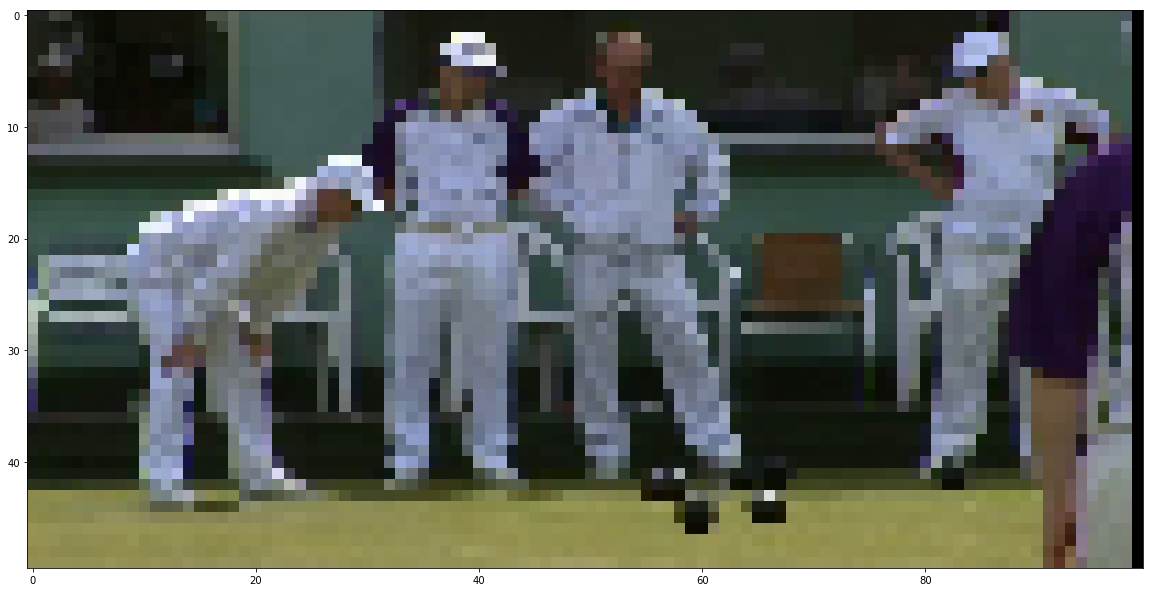

r_wrist [702.0, 150.0]
r_elbow [656.0, 110.0]
r_shoulder [708.0, 75.0]


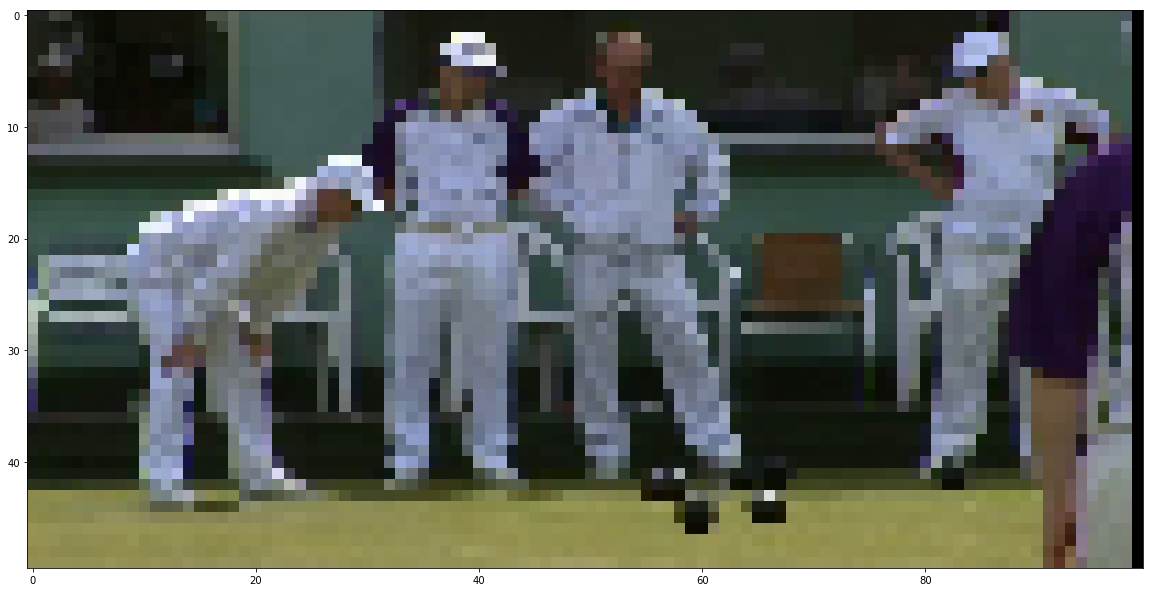

r_wrist [770.0, 471.0]
r_elbow [791.0, 395.0]
r_shoulder [838.0, 315.0]


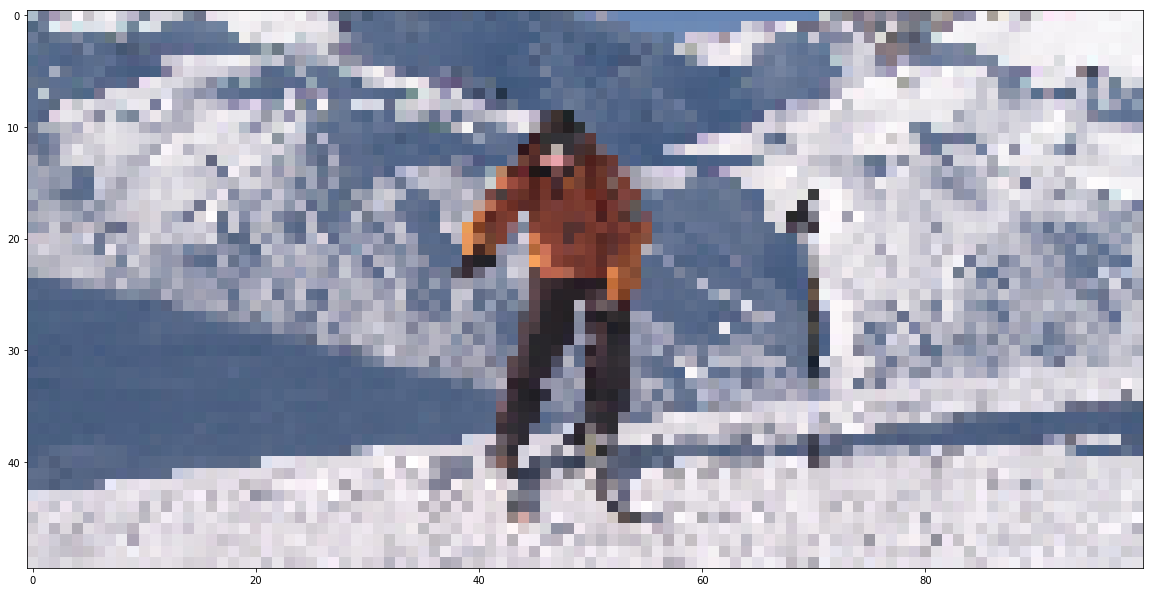

r_wrist [439.0, 375.0]
r_elbow [449.0, 357.0]
r_shoulder [464.0, 332.0]


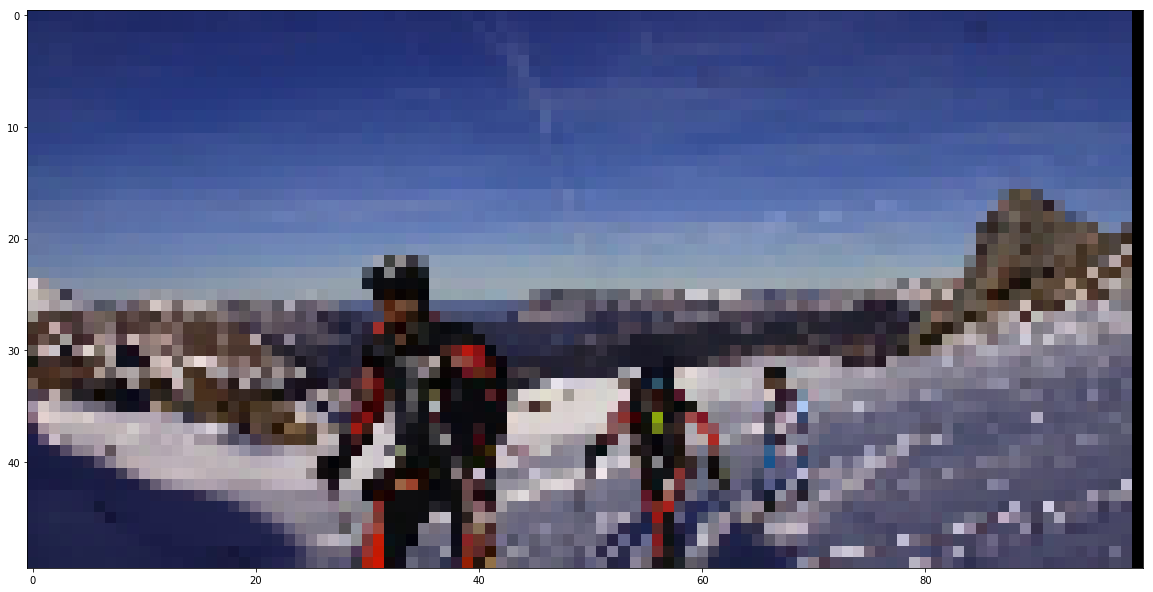

r_wrist [94.0, 244.0]
r_elbow [44.0, 213.0]
r_shoulder [89.0, 135.0]


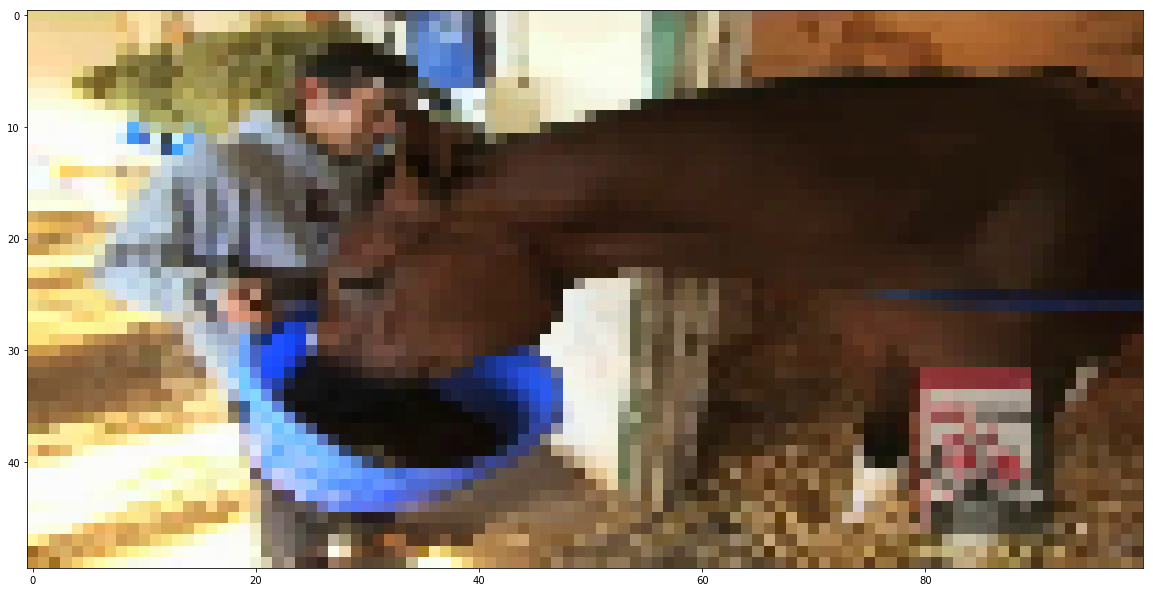

r_wrist [266.0, 493.0]
r_elbow [245.0, 468.0]
r_shoulder [279.0, 416.0]


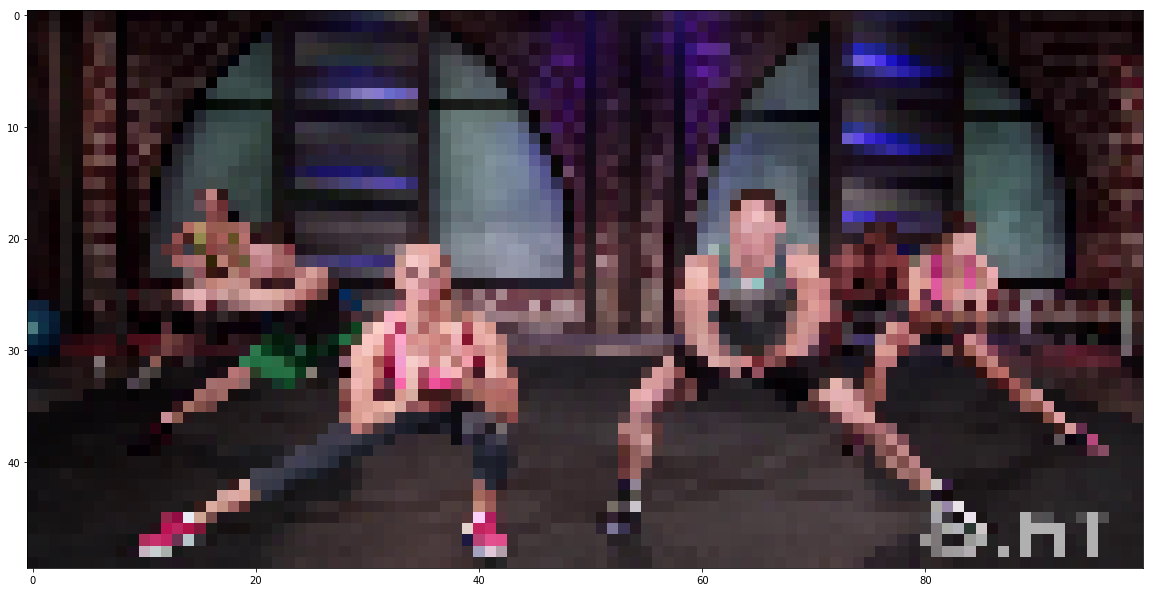

r_wrist [1009.0, 374.0]
r_elbow [978.0, 309.0]
r_shoulder [1026.0, 232.0]


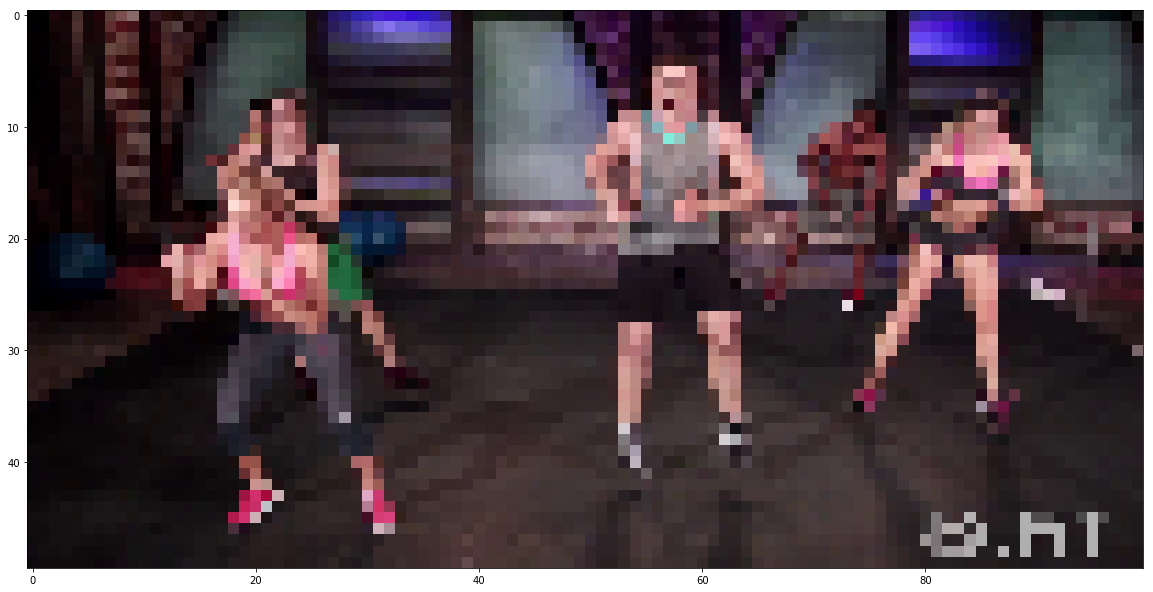

r_wrist [1355.0, 346.0]
r_elbow [1350.0, 283.0]
r_shoulder [1376.0, 245.0]


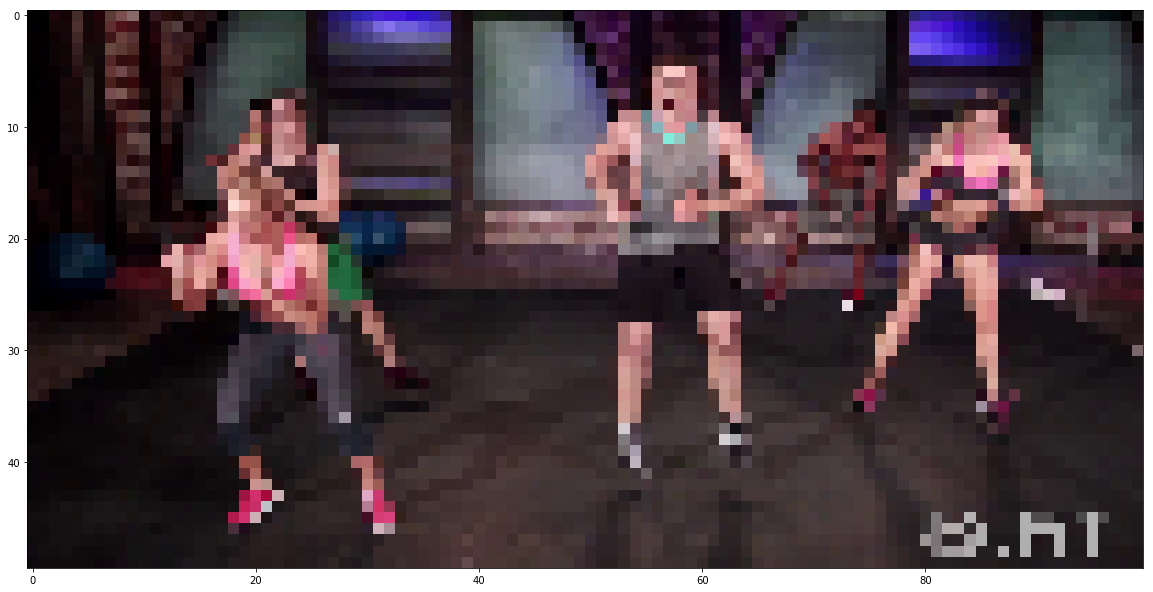

r_wrist [516.0, 229.0]
r_elbow [514.0, 178.0]
r_shoulder [581.0, 116.0]


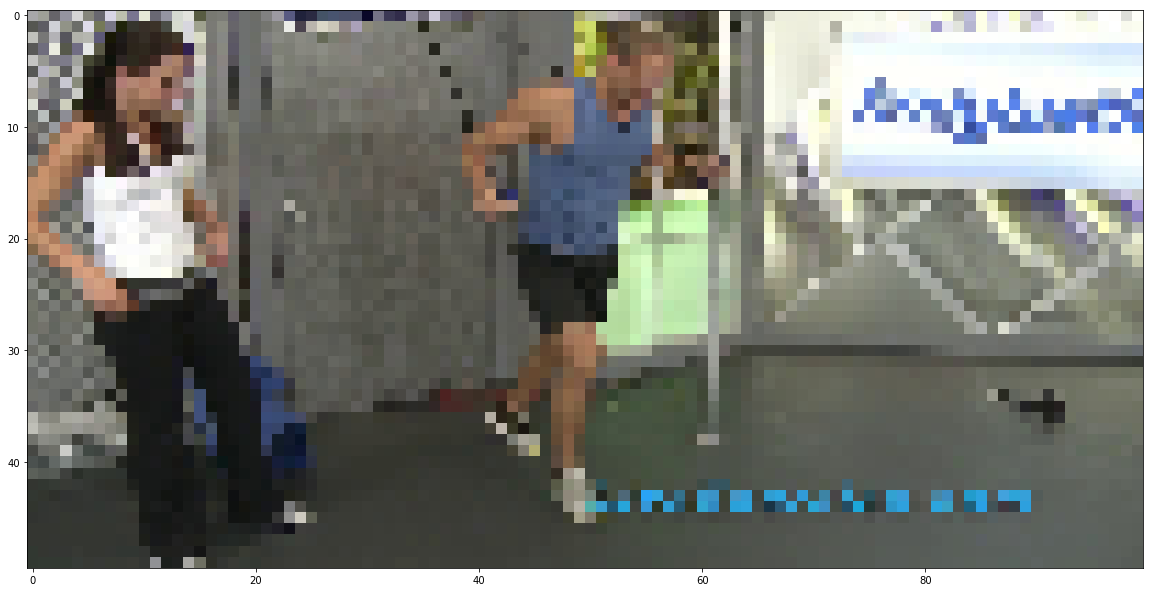

r_wrist [643.0, 421.0]
r_elbow [644.0, 391.0]
r_shoulder [653.0, 361.0]


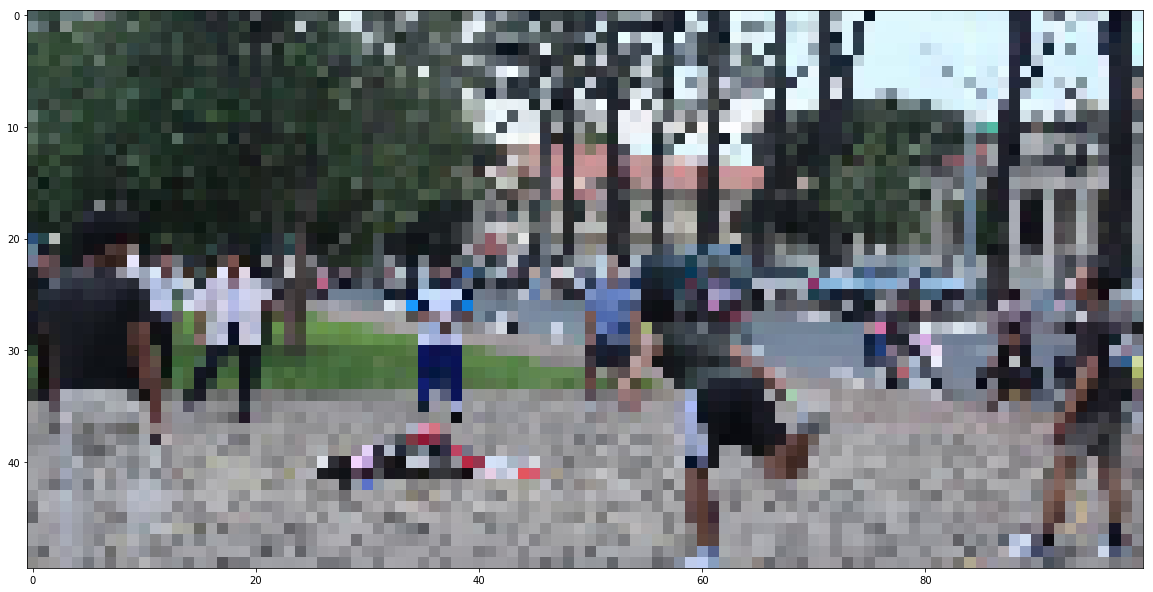

r_wrist [245.0, 197.0]
r_elbow [253.0, 163.0]
r_shoulder [257.0, 120.0]


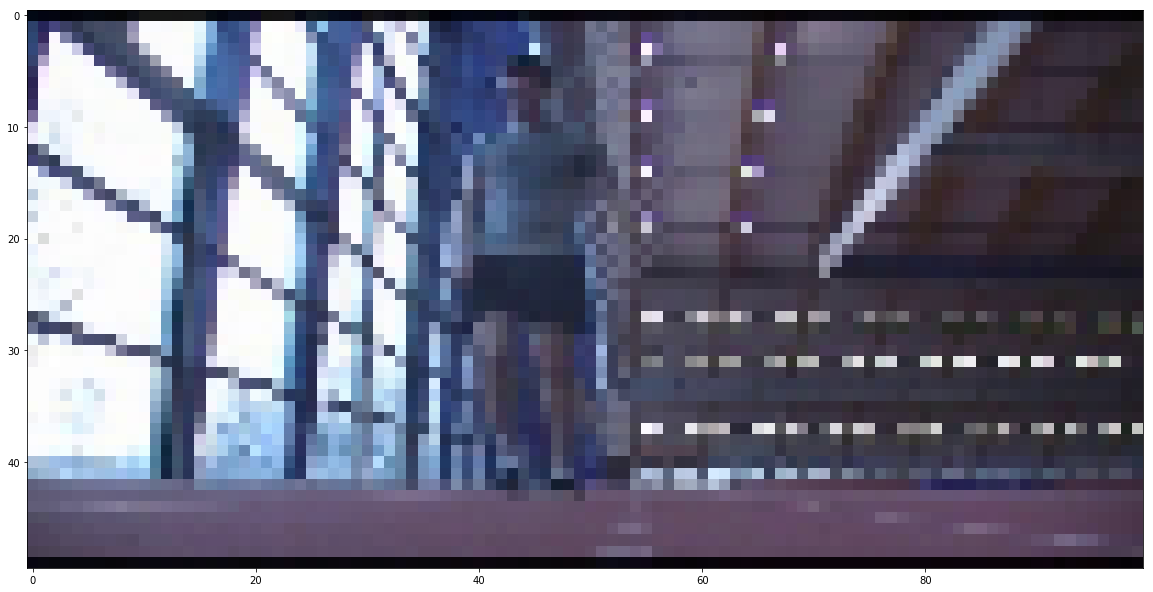

r_wrist [373.0, 190.0]
r_elbow [339.0, 142.0]
r_shoulder [392.0, 87.0]


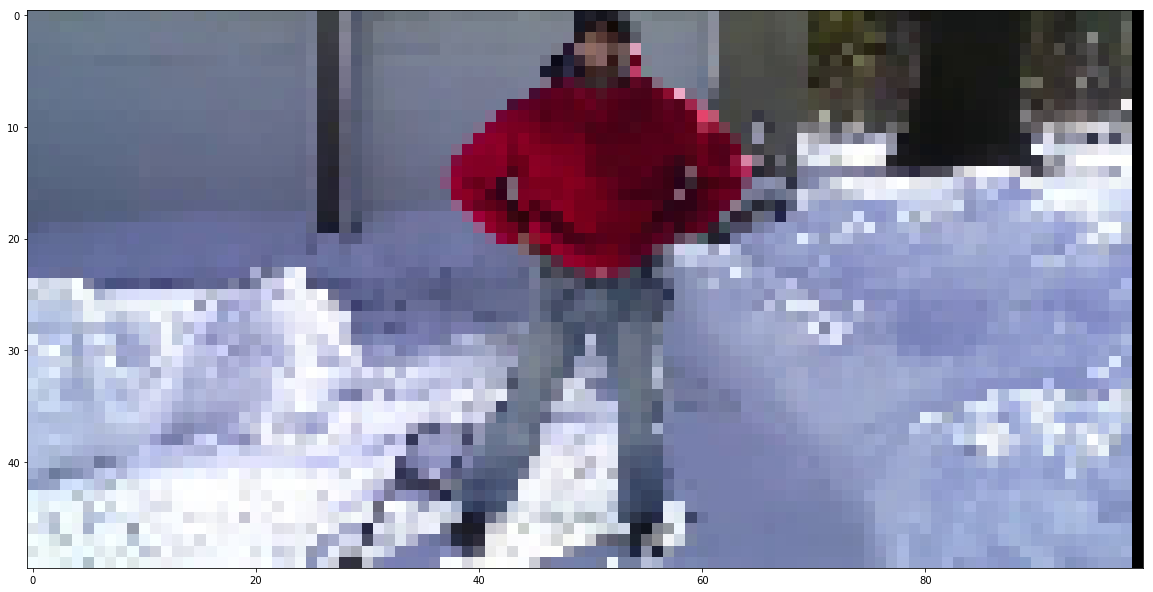

r_wrist [964.0, 479.0]
r_elbow [986.0, 466.0]
r_shoulder [998.0, 439.0]


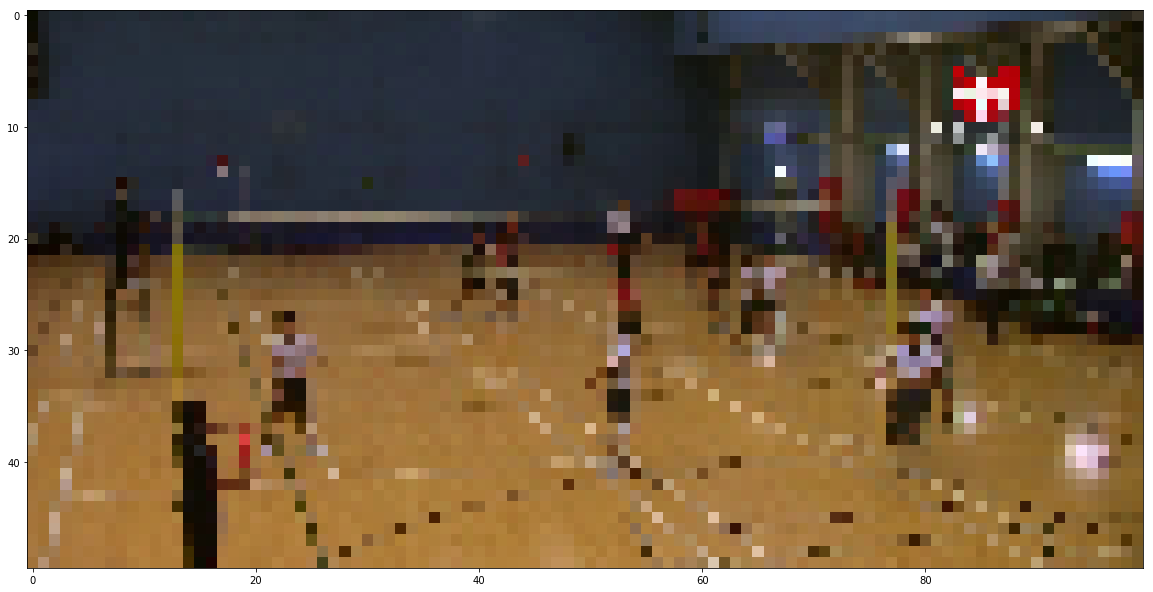

r_wrist [899.0, 231.0]
r_elbow [901.0, 207.0]
r_shoulder [914.0, 182.0]


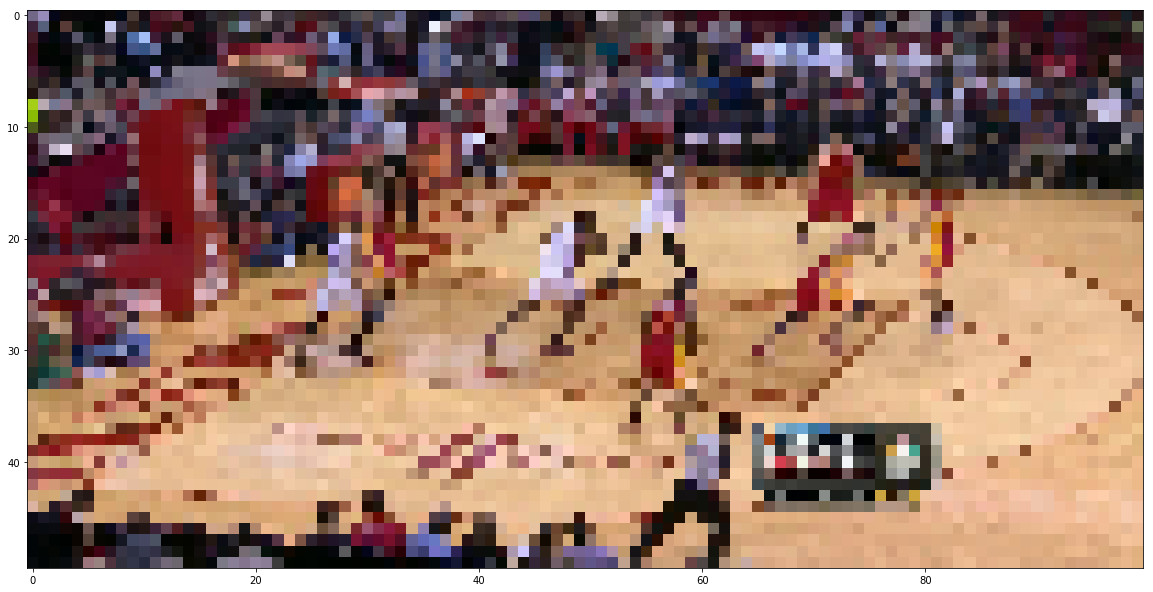

r_wrist [271.0, 249.0]
r_elbow [301.0, 210.0]
r_shoulder [311.0, 157.0]


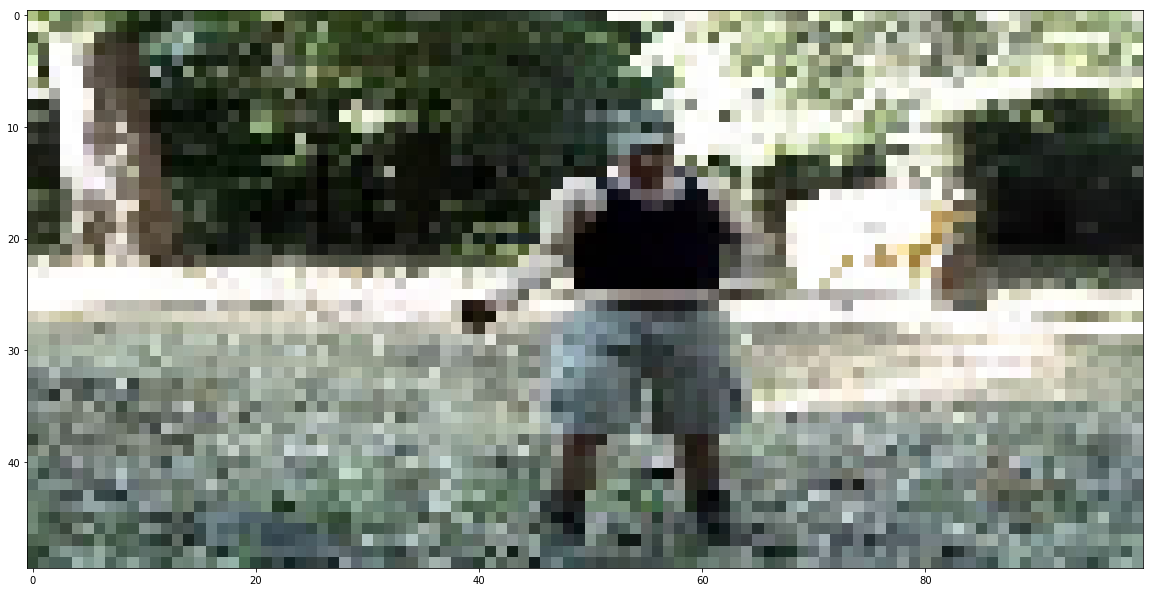

r_wrist [340.0, 276.0]
r_elbow [352.0, 228.0]
r_shoulder [367.0, 179.0]


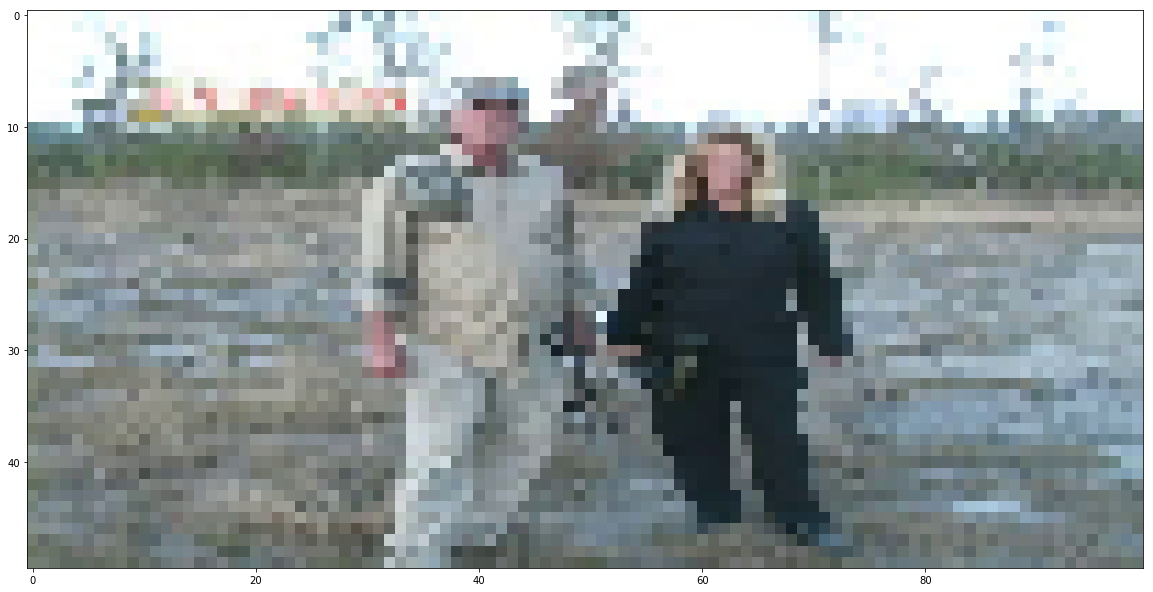

r_wrist [552.0, 365.0]
r_elbow [568.0, 343.0]
r_shoulder [578.0, 290.0]


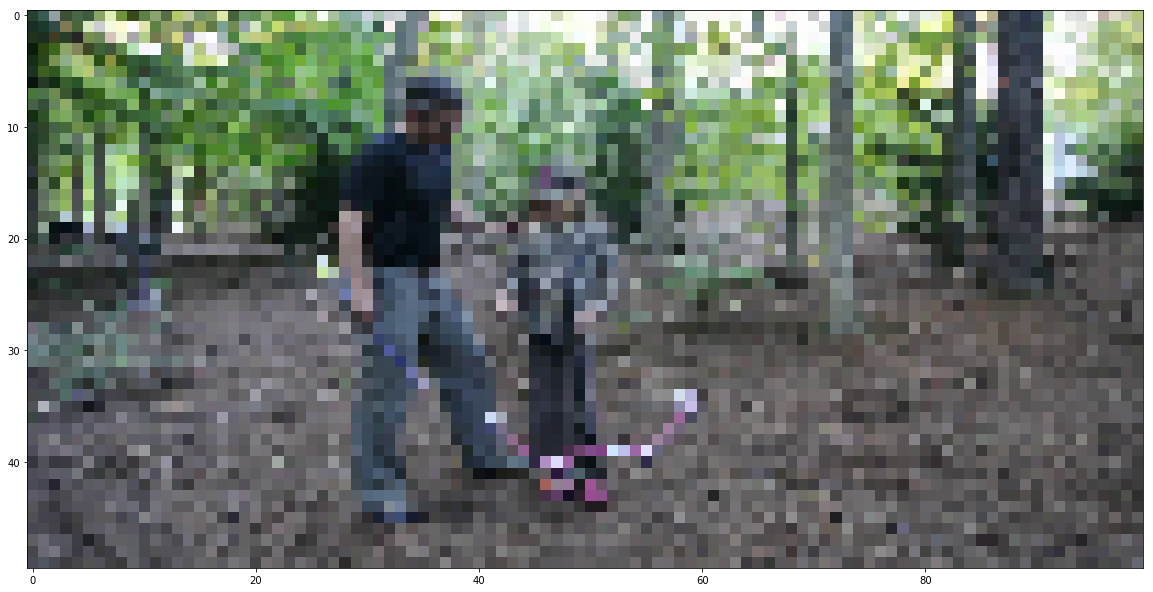

In [ ]:
img_lst = img_data['img_lst']
orig_joint_lst = img_data['orig_joint_lst']
for i in zero_class:
    display_img(img_lst[i], orig_joint_lst[i])

In [ ]:
dists = scipy.spatial.distance.pdist(joint_arr_reshaped)

In [ ]:
print("Total number of dists: ", len(dists))
print(joint_arr_reshaped.shape)

plt.figure(figsize=(20,30))
plt.hist(dists, 100, facecolor='green', alpha=0.75)
plt.show()

In [ ]:
def create_cluster(keypoints):
    centers = {}
    points_map = {}
    centers[0] = keypoints[0]
    points_map[0] = []
    for indx, keypoint in enumerate(keypoints):
        point_added = False
        min_score = 0.8
        choosen_center = -1
        for center_indx, center_keypoint in centers.items():
            dist = np.linalg.norm(center_keypoint-keypoint)
            if dist < min_score:
                point_added = True
                min_score = dist
                choosen_center = center_indx
                
        if point_added == False:
            centers[indx] = keypoint
            points_map[indx] = [indx]
        else:
            points_map[choosen_center].append(indx)
                
            
    return points_map

In [ ]:
#cluster_points = create_cluster(joint_arr_reshaped)
#for i in cluster_points:
#    display_img(img_lst[i], orig_joint_lst[i])

In [ ]:
points_map = create_cluster(joint_arr_reshaped)

In [ ]:
%matplotlib inline

def print_points(point_lst):
    cropped_img_dir = '../mpii/cropped_imgs/'
    plt.figure(figsize=(20,30))
    for idx, img_id in enumerate(point_lst[:25]):
        img = cv2.imread(cropped_img_dir+str(img_id)+'.jpeg')
        plt.subplot(25, 5, idx+1)
        plt.imshow(img[...,::-1])
        plt.axis('off')

def print_similar_poses(points_map, center_indx, extra_info=False):
    cropped_img_dir = '../mpii/cropped_imgs/'
    plt.figure(figsize=(20,30))
    if extra_info:
        ids_in_cluster, _ = points_map[center_indx]
    else:
        ids_in_cluster = points_map[center_indx]
    print('Total images in cluster: ', len(ids_in_cluster))
    for idx, img_id in enumerate(ids_in_cluster[:25]):
        img = cv2.imread(cropped_img_dir+str(img_id)+'.jpeg')
        plt.subplot(25, 5, idx+1)
        plt.imshow(img[...,::-1])
        plt.axis('off')
#plt.tight_layout(pad=0.2, w_pad=0.1, h_pad=1.0)
#plt.show()

In [ ]:
print(len(points_map))
print_similar_poses(points_map, 0)

In [ ]:
print_similar_poses(points_map, 1)

In [ ]:
print_similar_poses(points_map, list(points_map.keys())[300])

In [ ]:
print_similar_poses(points_map, list(points_map.keys())[350])

In [ ]:
def count_significant_grps(points_map, significant_size):
    total_size = 0
    count = 0
    grps = []
    for key, val in points_map.items():
        if len(val) >= significant_size:
            count += 1
            total_size += len(val)
            grps.append(val)
    return grps, count, total_size

def realign_center(point_grps, keypoints):
    points_map = {}
    # Iterating over point groups
    # to find best center for each group
    for points in point_grps:
        min_dist = 100000
        max_point = points[0] # Point which is farthest away from center for this grop
        curr_center = points[0]
        for center_point in points:
            total_dist = 0
            max_dist = 0
            max_dist_point = center_point # Point in the group which is farthest from the current center
            for point in points:
                curr_dist = np.linalg.norm(keypoints[center_point]-keypoints[point])
                if curr_dist > max_dist:
                    max_dist = curr_dist
                    max_dist_point = point
                total_dist += curr_dist
                
            if total_dist < min_dist:
                curr_center = center_point
                min_dist = total_dist
                max_point = max_dist_point
        points_map[curr_center] = (points, max_point)
    return points_map


# Add negative examples for each center
# Iterate over point map
# For each center, iterate over other centers
# if the dist of a point in other point group is more than
# 2 times the max dist for inner grp than add that point in the
# list of negative examples
def prepare_training_data(points_map, keypoints):
    training_data_map = {}
    for center_point in points_map.keys():
        points, max_point = points_map[center_point]
        total_pos_points = len(points)
        max_dist = 2*np.linalg.norm(keypoints[center_point]-keypoints[max_point]) 
        neg_points = []
        neg_points_full = False
        for neg_center_point in points_map.keys():
            if center_point == neg_center_point:
                continue
            
            curr_neg_points, _ = points_map[neg_center_point]
            for neg_point in curr_neg_points:
                neg_dist = np.linalg.norm(keypoints[center_point]-keypoints[neg_point])
                if neg_dist > max_dist:
                    neg_points.append(neg_point)
                    
                if len(neg_points) >= total_pos_points:
                    neg_points_full = True
                    break
                    
            if neg_points_full:
                break
                
        training_data_map[center_point] = (points, neg_points)
        
    return training_data_map
            
        
                

#print(count_significant_grps(points_map, 100))
#print(count_significant_grps(points_map, 200))

In [ ]:
grps_with_100_elems, _, _ = count_significant_grps(points_map, 100)
realigned_points = realign_center(grps_with_100_elems, joint_arr_reshaped)

In [ ]:
print(realigned_points.keys())

In [ ]:
print_similar_poses(realigned_points, 1794, True)

In [ ]:
training_data_map = prepare_training_data(realigned_points, joint_arr_reshaped)
pickle.dump(training_data_map, open( "training_data.p", "wb" ) )

In [ ]:
print(training_data_map.keys())

pos_points, neg_points = training_data_map[4544]
print(len(pos_points))
print(len(neg_points))

In [ ]:
print_points(pos_points)

In [ ]:
print_points(neg_points)